In this project we will predict the stock prices of Gold.
(Linear Regression and Support Vector Machine Section)

In [1]:
print("hello world")

hello world


In [4]:
import numpy as np
import pandas as pd

import yfinance as yf

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# We will make stock price predictor of natural gas.
stocks = input("Enter the code of the stock: ")
data = yf.download(stocks, "2008-01-01" , "2021-01-04" ,auto_adjust=True)
data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2007-12-31,843.200012,843.200012,843.200012,834.900024,4
2008-01-02,848.700012,857.799988,846.400024,857.000000,130
2008-01-03,863.000000,865.500000,856.299988,866.400024,181
2008-01-04,861.400024,865.500000,860.200012,863.099976,28
2008-01-07,860.900024,860.900024,857.400024,859.599976,4


<!-- Data Exploration -->

In [6]:
data.shape

(3272, 5)

In [7]:
data.info

<bound method DataFrame.info of                    Open         High          Low        Close  Volume
Date                                                                  
2007-12-31   843.200012   843.200012   843.200012   834.900024       4
2008-01-02   848.700012   857.799988   846.400024   857.000000     130
2008-01-03   863.000000   865.500000   856.299988   866.400024     181
2008-01-04   861.400024   865.500000   860.200012   863.099976      28
2008-01-07   860.900024   860.900024   857.400024   859.599976       4
...                 ...          ...          ...          ...     ...
2020-12-24  1877.300049  1879.900024  1875.699951  1879.900024      46
2020-12-28  1895.500000  1895.800049  1873.699951  1877.199951      75
2020-12-29  1881.300049  1881.300049  1879.699951  1879.699951     343
2020-12-30  1879.900024  1895.800049  1877.300049  1891.000000     444
2020-12-31  1897.000000  1901.300049  1892.699951  1893.099976     127

[3272 rows x 5 columns]>

In [8]:
data.describe()

,Open,High,Low,Close,Volume
count,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000
mean,1314.408833,1321.536920,1306.610728,1314.174450,5621.866443
std,261.328957,262.610764,259.927544,261.393937,29607.654225
min,705.000000,715.500000,681.000000,704.900024,0.000000
25%,1183.074982,1189.074982,1175.975006,1183.000000,41.000000
50%,1282.149963,1286.850037,1277.250000,1281.750000,137.000000
75%,1481.625000,1488.274994,1473.224976,1480.825043,445.000000
max,2045.500000,2063.000000,2040.000000,2051.500000,386334.000000


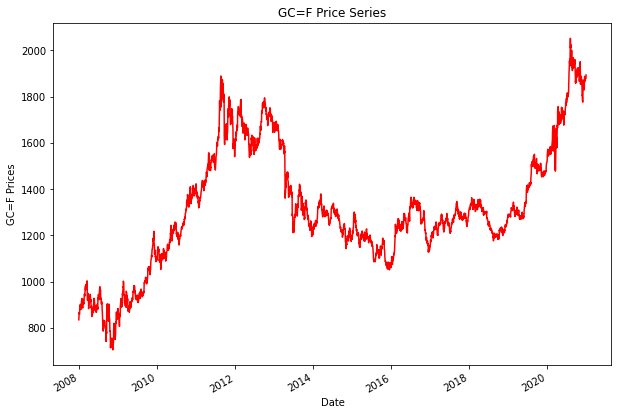

In [9]:
data.Close.plot(figsize=(10,7) , color = 'r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

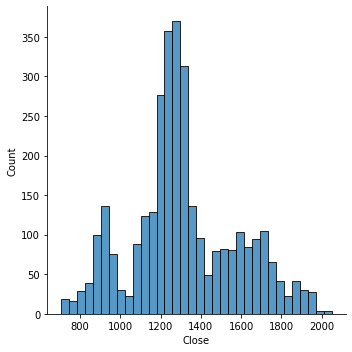

In [10]:
sns.displot(data['Close'])

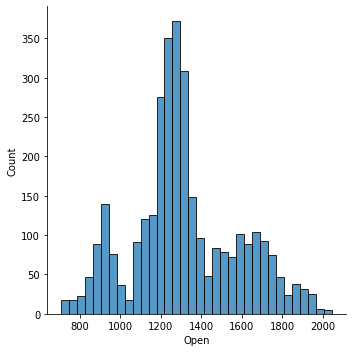

In [11]:
sns.displot(data['Open'])

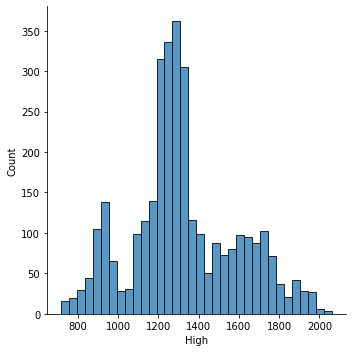

In [12]:
sns.displot(data['High'])

Conclusions
What we have understood 

- Shape of the data 
- How our data is distributed
- It very very non linear 
- Stock price predictor is very competitative in the market.



Linear , Logistic , Regularized , SVM (Support Vector Machines) 
Linear and regularized models works best in this case.

In [14]:
# For X-axis we are simply taking all the Open values, except the close value.
X = data.drop("Close" , axis=1)
y = data["Close"]  # This will tell us the direct of the stocks


from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=0)

# We have divided the data into Training set and Test set.
# 80% Data in training set === 20% Data in the testing set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2617, 4)
(655, 4)
(2617,)
(655,)


random_state = if you run your code one more time , you data will not be changed to your shuffle. So your data will not be changed.


In [15]:
# Moving on the Modelling Part 
# Linear Regression

from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(X_train , y_train)
pred1 = lr.predict(X_test)


In [16]:
# MSE --> Mean Squared
# RSE --> Root Mean Squared
#r2_square --> 1.0 (good model)

from sklearn.metrics import mean_squared_error , r2_score

def calculate_metrics(y_test , y_pred):

   # y_test : ground truth / actual label
   # y_pred : model predict value

    mse =  mean_squared_error(y_test , y_pred)
    rmse = np.sqrt(mse)
    r2_scors = r2_score(y_test , y_pred)
    print("MSE: " , mse)
    print("RMSE: " , rmse)
    print("R2_Score : " , r2_scors)

calculate_metrics(y_test , pred1)

MSE:  31.941263748242168
RMSE:  5.651660264757797
R2_Score :  0.999559655373663


In [18]:
from sklearn.linear_model import Lasso , Ridge
# It simply removes the least important features

la = Lasso().fit(X_train , y_train)
ri = Ridge().fit(X_train , y_train)

la_p = la.predict(X_test)
ri_p = ri.predict(X_test)

# Check the prediction using Lasso Regression and it is less prone to overfitting
calculate_metrics(y_test , la_p)

# Check the prediction using rigiod regression and it is less prone to overfitting as well
# Similar result to Linear Regression
calculate_metrics(y_test , ri_p)


MSE:  43.782786719489984
RMSE:  6.6168562565231825
R2_Score :  0.9993964072614676
MSE:  31.941234103431302
RMSE:  5.651657642093274
R2_Score :  0.9995596557823485


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.614e+04, tolerance: 1.758e+04
  model = cd_fast.enet_coordinate_descent(


In [20]:
# For SVM , if you have a lot of features it should work well with the data
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

# We use this params_grid to check how model reacts or predicts with different values.
param_grid = {'C' : [0.1,1,10,100,1000] , 'gamma' : [1,0.1,0.01,0.001,0.00001] , 'kernel' : ['rbf']}

grid = GridSearchCV(SVR() , param_grid , refit=True, verbose=3)
grid.fit(X_train , y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.025 total time=   0.4s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.013 total time=   0.4s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.001 total time=   0.4s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.006 total time=   0.3s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.031 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.025 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.013 total time=   0.3s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.001 total time=   0.4s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.006 total time=   0.4s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.031 total time=   0.3s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.025 total time=   0.3s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 1e-05],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
svr = SVR(C=10 , gamma = 0.01 , kernel = 'rbf')
svr.fit(X_train , y_train)
svr_pred = svr.predict(X_test)

In [21]:
# We use this library to save   this model == joblib
import joblib 

joblib.dumps(ri, 'model.pkl')
ridge_from_joblib = model = joblib.load("model.pk1")

AttributeError: module 'joblib' has no attribute 'dumps'